# Challenge Chapter 2

<h1> Latar Belakang </h1>

<p> Perkembangan industri telekomunikasi sangatlah cepat, hal ini dapat dilihat dari perilaku masyarakat yang menggunakan internet dalam berkomunikasi. </p>

<p> Perilaku ini menyebabkan banyaknya perusahaan telekomunikasi dan meningkatnya internet service provider yang dapat menimbulkan persaingan antar provider. </p>

<p> Pelanggan memiliki hak dalam memilih provider yang sesuai dan dapat beralih dari provider sebelumnya yang diartikan sebagai <b> Customer Churn </b>. </p>

<p> Peralihan ini dapat menyebabkan berkurangnya pendapatan bagi perusahaan telekomunikasi sehingga penting untuk ditangani </p>

<h1> Tugas </h1>

<ol>
  <li> Buat model machine learning dengan algoritma klasifikasi (supervised learning) menggunakan <a href="https://drive.google.com/file/d/1nq9KX84DMUQVbTqFdyEw2witiXITI79k/view"> data_train.csv </a></li>
  <li> Lakukan prediksi customer yang churn dari hasil model (poin 1) menggunakan <a href="https://drive.google.com/file/d/1NSMsyOtxUYMKj0HRrH7iEgr_nm-c-1BO/view"> data_test.csv </a></li>
  <li> Kumpulkan code dalam bentuk file .ipynb/Google Colab dan hasil interpretasi dalam bentuk ppt / pdf mengenai step by step penyelesaian dan hasil yang sudah dilakukan menggunakan form submission yang disediakan oleh Tim Binar maksimal 18 Oktober 2022 pukul 23.59 WIB </li>
</ol>

# Import Library

In [1]:
import pandas as pd

# Run if using upload files
import io

# Mounting in Drive or Upload Files (Choose One)

In [2]:
# Mounting in Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Upload Files
from google.colab import files
uploaded = files.upload()

# Read Files (Choose One)

In [3]:
# Read Files in Drive
df_train = pd.read_csv('/content/drive/MyDrive/FGA-Binar Academy/Challenge Chapter 2/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/FGA-Binar Academy/Challenge Chapter 2/test.csv')

In [ ]:
# Read Files 
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

# EDA (Exploratory Data Analysis)

In [4]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
df_train.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4249,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [7]:
df_train.shape

(4250, 20)

In [8]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
df_train.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845
total_day_charge,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956
total_eve_charge,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

### Correlation Heat Map

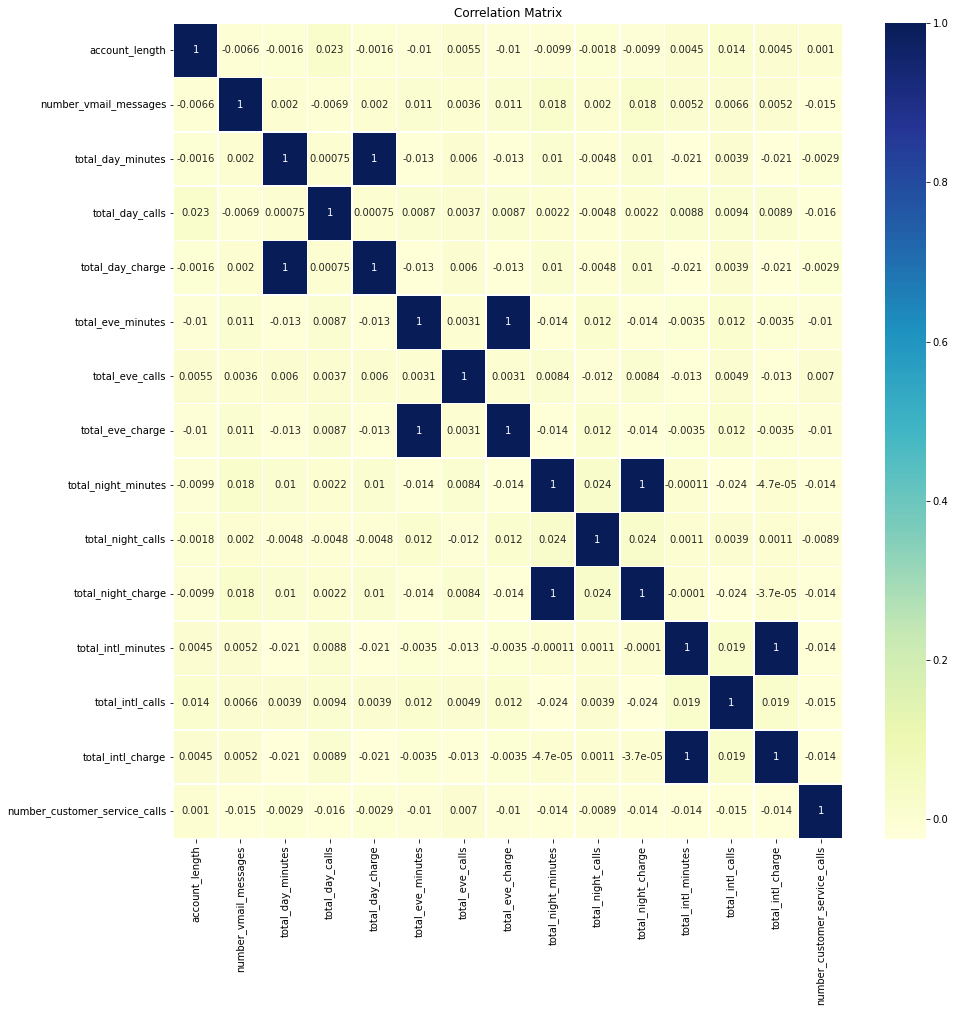

In [11]:
df_numerized = df_train.copy()

plt.figure(figsize=(15,15))
sns.heatmap(data=df_numerized.corr(), annot=True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlation Matrix', fontsize=12);

### Persentase Churn

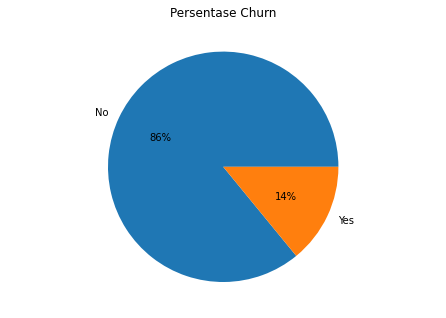

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
Churn = df_train.churn.value_counts()
ax.pie(Churn, labels=labels, autopct='%.0f%%')
plt.title('Persentase Churn')
plt.show()

In [13]:
df_train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

### Churn by State

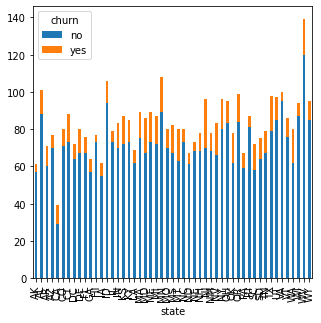

In [14]:
df_train.groupby(['state', 'churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [15]:
df_train.groupby(['churn', 'state']).sum()

account_length  number_vmail_messages  total_day_minutes  \
churn state                                                             
no    AK               5563                    555            10102.5   
      AL               8414                    743            16202.7   
      AR               5775                    650            10267.2   
      AZ               7302                    746            12221.2   
      CA               2855                    180             4864.5   
...                     ...                    ...                ...   
yes   VT               1053                     41             2141.9   
      WA               1941                     33             3873.4   
      WI                703                     28             1472.3   
      WV               1970                     74             3801.0   
      WY               1124                     26             2416.0   

             total_day_calls  total_day_charge  total_eve_minutes  \
churn state                                                         
no    AK                5564           1717.46            10781.6   
      AL                8775           2754.49            17231.2   
      AR                5838           1745.47            11607.3   
      AZ                6837           2077.66            13501.0   
      CA                3023            827.00             5553.1   
...                      ...               ...                ...   
yes   VT                 986            364.14             2316.2   
      WA                1781            658.49             3824.1   
      WI                 678            250.29             1337.8   
      WV                1919            646.18             4032.1   
      WY                1004            410.71             2191.8   

             total_eve_calls  total_eve_charge  total_night_minutes  \
churn state                                                           
no    AK                5641            916.42              11208.7   
      AL                8677           1464.68              16709.8   
      AR                5879            986.64              12201.0   
      AZ                7085           1147.60              12912.4   
      CA                2988            472.05               5673.3   
...                      ...               ...                  ...   
yes   VT                 964            196.88               2198.7   
      WA                1775            325.07               3602.2   
      WI                 772            113.71               1173.9   
      WV                1958            342.73               3607.1   
      WY                 966            186.30               2149.0   

             total_night_calls  total_night_charge  total_intl_minutes  \
churn state                                                              
no    AK                  5672              504.37               572.1   
      AL                  8496              751.97               912.5   
      AR                  6065              549.07               615.2   
      AZ                  7044              581.10               749.8   
      CA                  2776              255.30               268.9   
...                        ...                 ...                 ...   
yes   VT                   949               98.94               102.1   
      WA                  1859              162.11               186.0   
      WI                   735               52.81                59.6   
      WV                  1866              162.32               215.6   
      WY                  1001               96.72               113.9   

             total_intl_calls  total_intl_charge  \
churn state                                        
no    AK                  291             154.51   
      AL                  393             246.41   
      AR                  279             166.12   
      AZ          

### Churn by Area Code

In [16]:
df_train.groupby(['churn', 'area_code']).sum()

account_length  number_vmail_messages  total_day_minutes  \
churn area_code                                                                 
no    area_code_408           94584                   7397           161564.2   
      area_code_415          181768                  15316           323043.1   
      area_code_510           88574                   7151           156519.9   
yes   area_code_408           15700                    804            32179.7   
      area_code_415           29493                   1046            59946.5   
      area_code_510           15885                    721            32849.9   

                     total_day_calls  total_day_charge  total_eve_minutes  \
churn area_code                                                             
no    area_code_408            92369          27466.44           186416.4   
      area_code_415           183931          54918.51           360025.1   
      area_code_510            88220          26608.80           178738.6   
yes   area_code_408            15322           5470.60            32123.5   
      area_code_415            28833          10190.97            59676.4   
      area_code_510            15931           5584.58            33759.1   

                     total_eve_calls  total_eve_charge  total_night_minutes  \
churn area_code                                                               
no    area_code_408            94229          15845.51             184622.6   
      area_code_415           182246          30602.62             364718.1   
      area_code_510            89570          15193.04             179516.4   
yes   area_code_408            15129           2730.54              30722.1   
      area_code_415            28636           5072.48              59960.6   
      area_code_510            15940           2869.61              32703.7   

                     total_night_calls  total_night_charge  \
churn area_code                                              
no    area_code_408              92949             8308.16   
      area_code_415             181850            16412.60   
      area_code_510              90192             8078.33   
yes   area_code_408              14723             1382.47   
      area_code_415              28733             2698.31   
      area_code_510              15871             1471.67   

                     total_intl_minutes  total_intl_calls  total_intl_charge  \
churn area_code                                                                
no    area_code_408              9422.7              4110            2544.70   
      area_code_415             18729.1              8261            5057.82   
      area_code_510              9078.3              3919            2451.50   
yes   area_code_408              1556.7               656             420.45   
      area_code_415              3094.5              1204             835.61   
      area_code_510              1707.0               662             460.95   

                     number_customer_service_calls  
churn area_code                                     
no    area_code_408                           1354  
      area_code_415                           2568  
      area_code_510                           1343  
yes   area_code_408                            353  
      area_code_415                            647  
      area_code_510                            361

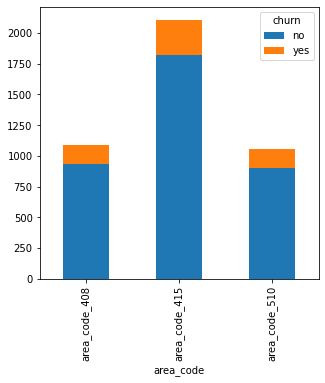

In [17]:
df_train.groupby(['area_code', 'churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn by Customers with International Plan

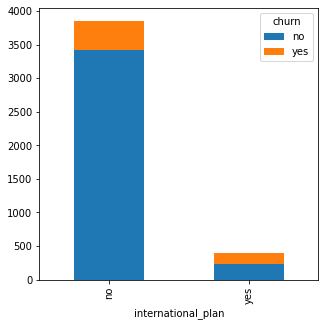

In [18]:
df_train.groupby(['international_plan', 'churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [19]:
df_train.groupby(['churn', 'international_plan']).sum()

account_length  number_vmail_messages  \
churn international_plan                                          
no    no                          341095                  27803   
      yes                          23831                   2061   
yes   no                           43889                   1530   
      yes                          17189                   1041   

                          total_day_minutes  total_day_calls  \
churn international_plan                                       
no    no                           599725.7           341256   
      yes                           41401.5            23264   
yes   no                            92322.1            43547   
      yes                           32654.0            16539   

                          total_day_charge  total_eve_minutes  \
churn international_plan                                        
no    no                         101955.33           678143.7   
      yes                          7038.42            47036.4   
yes   no                          15694.90            91868.9   
      yes                          5551.25            33690.1   

                          total_eve_calls  total_eve_charge  \
churn international_plan                                      
no    no                           342884          57643.05   
      yes                           23161           3998.12   
yes   no                            43270           7808.93   
      yes                           16435           2863.70   

                          total_night_minutes  total_night_calls  \
churn international_plan                                           
no    no                             683765.3             341903   
      yes                             45091.8              23088   
yes   no                              90356.3              42701   
      yes                             33030.1              16626   

                          total_night_charge  total_intl_minutes  \
churn international_plan                                           
no    no                            30769.93             34990.0   
      yes                            2029.16              2240.1   
yes   no                             4066.07              4455.7   
      yes                            1486.38              1902.5   

                          total_intl_calls  total_intl_charge  \
churn international_plan                                        
no    no                             15164            9449.06   
      yes                             1126             604.96   
yes   no                              1874            1203.28   
      yes                              648             513.73   

                          number_customer_service_calls  
churn international_plan                                 
no    no                                           4965  
      yes                                           300  
yes   no                                           1058  
      yes                                           303

### Churn by Customers with Voice Mail Plan

In [20]:
df_train.groupby(['churn', 'voice_mail_plan']).sum()

account_length  number_vmail_messages  \
churn voice_mail_plan                                          
no    no                       262287                      0   
      yes                      102639                  29864   
yes   no                        52131                      0   
      yes                        8947                   2571   

                       total_day_minutes  total_day_calls  total_day_charge  \
churn voice_mail_plan                                                         
no    no                        455158.8           262046          77378.61   
      yes                       185968.4           102474          31615.14   
yes   no                        110561.7            51834          18795.69   
      yes                        14414.4             8252           2450.46   

                       total_eve_minutes  total_eve_calls  total_eve_charge  \
churn voice_mail_plan                                                         
no    no                        517291.4           262852          43970.37   
      yes                       207888.7           103193          17670.80   
yes   no                        109729.7            51492           9327.09   
      yes                        15829.3             8213           1345.54   

                       total_night_minutes  total_night_calls  \
churn voice_mail_plan                                           
no    no                          520073.8             261848   
      yes                         208783.3             103143   
yes   no                          107500.7              51153   
      yes                          15885.7               8174   

                       total_night_charge  total_intl_minutes  \
churn voice_mail_plan                                           
no    no                         23403.70             26688.2   
      yes                         9395.39             10541.9   
yes   no                          4837.62              5453.6   
      yes                          714.83               904.6   

                       total_intl_calls  total_intl_charge  \
churn voice_mail_plan                                        
no    no                          11776            7207.14   
      yes                          4514            2846.88   
yes   no                           2140            1472.72   
      yes                           382             244.29   

                       number_customer_service_calls  
churn voice_mail_plan                                 
no    no                                        3815  
      yes                                       1450  
yes   no                                        1130  
      yes                                        231

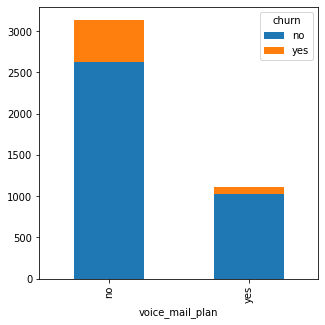

In [21]:
df_train.groupby(['voice_mail_plan', 'churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Categorical Features

Text(0, 0.5, 'Total Distribution')

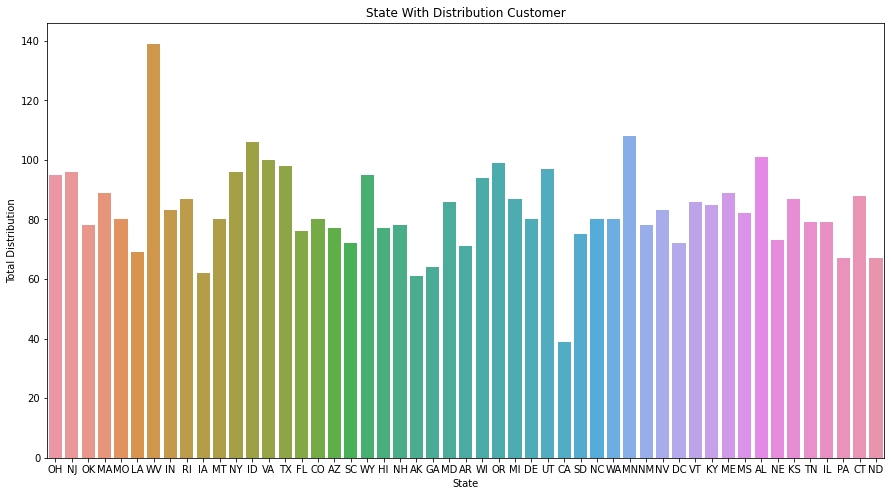

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(x='state', data=df_train)
plt.title('State With Distribution Customer')
plt.xlabel('State')
plt.ylabel('Total Distribution')

Text(0, 0.5, 'Total Distribution')

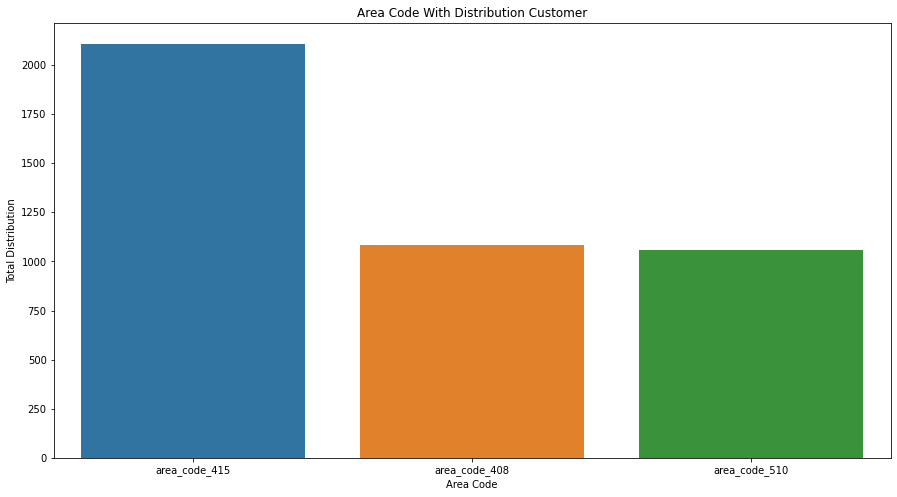

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(x='area_code', data=df_train)
plt.title('Area Code With Distribution Customer')
plt.xlabel('Area Code')
plt.ylabel('Total Distribution')

Text(0, 0.5, 'Total Distribution')

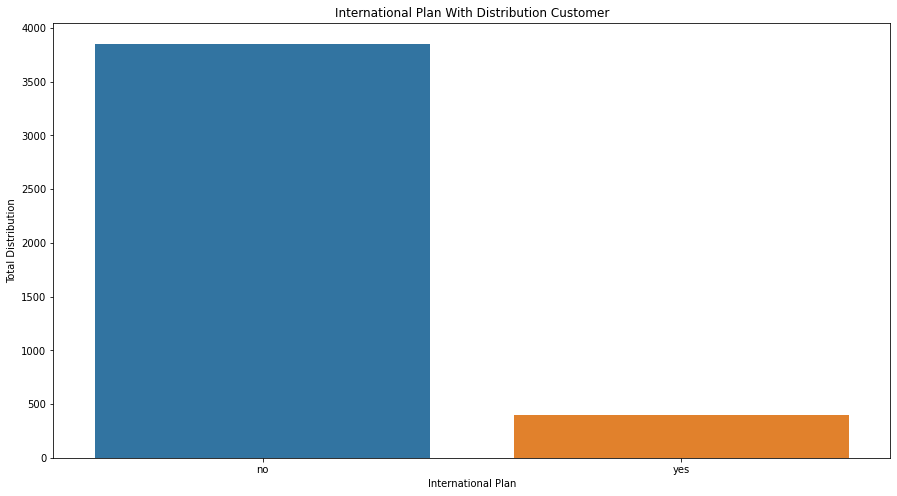

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(x='international_plan', data=df_train)
plt.title('International Plan With Distribution Customer')
plt.xlabel('International Plan')
plt.ylabel('Total Distribution')

Text(0, 0.5, 'Total Distribution')

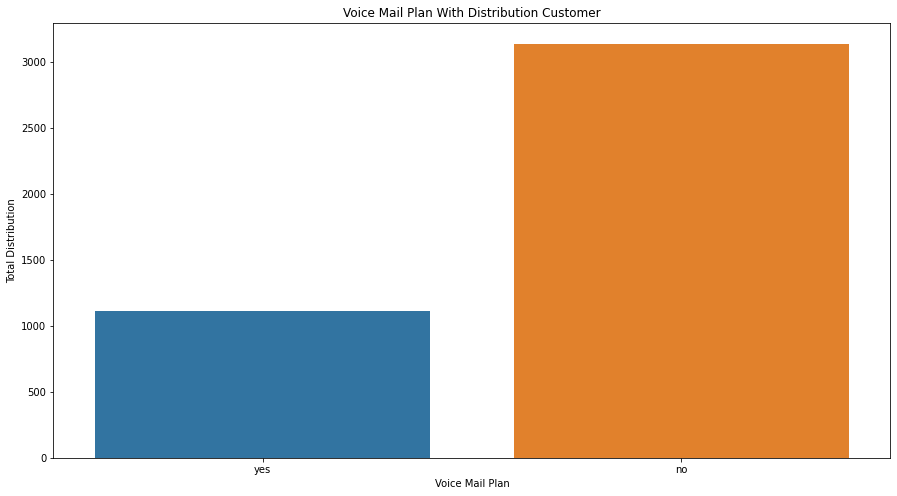

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x='voice_mail_plan', data=df_train)
plt.title('Voice Mail Plan With Distribution Customer')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Total Distribution')

# Preprocessing Data Train

### Data Cleaning

#### Missing Value

In [26]:
df_train.isna().values.any()

False

In [ ]:
# Run if result from above is True 
df_train.isna().sum()

#### Duplicated Data

In [27]:
df_train.duplicated().sum()

0

### Detect Outliers

In [28]:
numerical_train = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_day_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

In [29]:
import numpy as np

# Using IQR
print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))

for col in numerical_train :
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit)) & filtered_entries
    
df_train = df_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_train)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3515


### Normalization

In [30]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000
mean,99.566145,6.939687,180.081195,99.818208,30.614370,200.424780,100.026743,17.036327,200.859431,99.891038,9.038808,10.308791,4.257468,2.783898,1.303556
std,39.130022,12.534587,52.636074,19.295141,8.948063,48.932659,19.438500,4.159313,48.584763,19.398227,2.186334,2.563978,2.074590,0.692227,0.975672
min,1.000000,0.000000,34.500000,48.000000,5.870000,64.300000,47.000000,5.470000,67.700000,46.000000,3.050000,3.300000,1.000000,0.890000,0.000000
25%,73.000000,0.000000,143.600000,87.000000,24.410000,166.850000,87.000000,14.185000,167.550000,87.000000,7.540000,8.600000,3.000000,2.320000,1.000000
50%,99.000000,0.000000,180.200000,100.000000,30.630000,200.900000,100.000000,17.080000,201.000000,100.000000,9.050000,10.400000,4.000000,2.810000,1.000000
75%,127.000000,0.000000,216.000000,113.000000,36.720000,233.700000,113.000000,19.860000,235.000000,113.000000,10.580000,12.000000,5.000000,3.240000,2.000000
max,204.000000,40.000000,325.400000,152.000000,55.320000,335.000000,154.000000,28.480000,333.500000,153.000000,15.010000,17.200000,10.000000,4.640000,3.000000


In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
df_train['account_length'] = MinMaxScaler().fit_transform(df_train['account_length'].values.reshape(len(df_train), 1))
df_train['number_vmail_messages'] = MinMaxScaler().fit_transform(df_train['number_vmail_messages'].values.reshape(len(df_train), 1))
df_train['total_day_minutes'] = MinMaxScaler().fit_transform(df_train['total_day_minutes'].values.reshape(len(df_train), 1))
df_train['total_day_calls'] = MinMaxScaler().fit_transform(df_train['total_day_calls'].values.reshape(len(df_train), 1))
df_train['total_day_charge'] = MinMaxScaler().fit_transform(df_train['total_day_charge'].values.reshape(len(df_train), 1))
df_train['total_eve_minutes'] = MinMaxScaler().fit_transform(df_train['total_eve_minutes'].values.reshape(len(df_train), 1))
df_train['total_eve_calls'] = MinMaxScaler().fit_transform(df_train['total_eve_calls'].values.reshape(len(df_train), 1))
df_train['total_eve_charge'] = MinMaxScaler().fit_transform(df_train['total_eve_charge'].values.reshape(len(df_train), 1))
df_train['total_night_minutes'] = MinMaxScaler().fit_transform(df_train['total_night_minutes'].values.reshape(len(df_train), 1))
df_train['total_night_calls'] = MinMaxScaler().fit_transform(df_train['total_night_calls'].values.reshape(len(df_train), 1))
df_train['total_night_charge'] = MinMaxScaler().fit_transform(df_train['total_night_charge'].values.reshape(len(df_train), 1))
df_train['total_intl_minutes'] = MinMaxScaler().fit_transform(df_train['total_intl_minutes'].values.reshape(len(df_train), 1))
df_train['total_intl_calls'] = MinMaxScaler().fit_transform(df_train['total_intl_calls'].values.reshape(len(df_train), 1))
df_train['total_intl_charge'] = MinMaxScaler().fit_transform(df_train['total_intl_charge'].values.reshape(len(df_train), 1))
df_train['number_customer_service_calls'] = MinMaxScaler().fit_transform(df_train['number_customer_service_calls'].values.reshape(len(df_train), 1))

In [33]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000
mean,0.485548,0.173492,0.500451,0.498252,0.500392,0.502862,0.495577,0.502665,0.500976,0.503655,0.500736,0.504230,0.361941,0.505039,0.434519
std,0.192759,0.313365,0.180942,0.185530,0.180952,0.180763,0.181668,0.180761,0.182787,0.181292,0.182804,0.184459,0.230510,0.184594,0.325224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354680,0.000000,0.375043,0.375000,0.374924,0.378833,0.373832,0.378748,0.375658,0.383178,0.375418,0.381295,0.222222,0.381333,0.333333
50%,0.482759,0.000000,0.500859,0.500000,0.500708,0.504618,0.495327,0.504563,0.501505,0.504673,0.501672,0.510791,0.333333,0.512000,0.333333
75%,0.620690,0.000000,0.623926,0.625000,0.623862,0.625785,0.616822,0.625380,0.629421,0.626168,0.629599,0.625899,0.444444,0.626667,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Encoding

In [34]:
categorical_train = ['area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [35]:
for col in categorical_train :
    df_train[col] = df_train[col].astype('category')
  
df_train.dtypes

state                              object
account_length                    float64
area_code                        category
international_plan               category
voice_mail_plan                  category
number_vmail_messages             float64
total_day_minutes                 float64
total_day_calls                   float64
total_day_charge                  float64
total_eve_minutes                 float64
total_eve_calls                   float64
total_eve_charge                  float64
total_night_minutes               float64
total_night_calls                 float64
total_night_charge                float64
total_intl_minutes                float64
total_intl_calls                  float64
total_intl_charge                 float64
number_customer_service_calls     float64
churn                            category
dtype: object

In [36]:
for col in categorical_train :
    df_train[col] = df_train[col].cat.codes
  
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,0.522167,1,0,1,0.650,0.436920,0.721154,0.436805,0.484669,0.523364,0.484572,0.702408,0.532710,0.702341,0.748201,0.222222,0.749333,0.333333,0
1,NJ,0.669951,1,0,0,0.000,0.718116,0.634615,0.718099,0.210196,0.588785,0.209909,0.357035,0.542056,0.357023,0.640288,0.444444,0.640000,0.000000,0
3,OK,0.364532,1,1,0,0.000,0.454452,0.625000,0.454398,0.310307,0.700935,0.310300,0.448457,0.700935,0.448161,0.489209,0.222222,0.490667,1.000000,0
5,MO,0.719212,1,1,0,0.000,0.421107,0.298077,0.421031,0.143332,0.439252,0.142981,0.542137,0.467290,0.541806,0.273381,0.555556,0.274667,0.000000,0
7,WV,0.689655,1,1,1,0.925,0.770368,0.346154,0.770273,0.582564,0.598131,0.582355,0.973288,0.476636,0.973244,0.568345,0.444444,0.568000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,ND,0.684729,2,0,0,0.000,0.722585,0.644231,0.722548,0.717769,0.504673,0.717514,0.615500,0.616822,0.615385,0.302158,0.555556,0.304000,0.333333,1
4245,MT,0.403941,1,0,0,0.000,0.528704,0.211538,0.528615,0.663096,0.383178,0.662755,0.549285,0.308411,0.549331,0.503597,0.555556,0.504000,0.000000,0
4246,WV,0.354680,0,0,0,0.000,0.492953,0.394231,0.492821,0.247137,0.327103,0.246849,0.445824,0.401869,0.445652,0.589928,0.555556,0.592000,1.000000,0
4247,NC,0.364532,0,0,0,0.000,0.468202,0.509615,0.468150,0.475803,0.738318,0.475445,0.231001,0.542056,0.230769,0.258993,0.666667,0.258667,0.333333,0


# Split Variable

In [37]:
X = df_train.drop(['state', 'churn'], axis=1)
X.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.522167,1,0,1,0.650,0.436920,0.721154,0.436805,0.484669,0.523364,0.484572,0.702408,0.532710,0.702341,0.748201,0.222222,0.749333,0.333333
1,0.669951,1,0,0,0.000,0.718116,0.634615,0.718099,0.210196,0.588785,0.209909,0.357035,0.542056,0.357023,0.640288,0.444444,0.640000,0.000000
3,0.364532,1,1,0,0.000,0.454452,0.625000,0.454398,0.310307,0.700935,0.310300,0.448457,0.700935,0.448161,0.489209,0.222222,0.490667,1.000000
5,0.719212,1,1,0,0.000,0.421107,0.298077,0.421031,0.143332,0.439252,0.142981,0.542137,0.467290,0.541806,0.273381,0.555556,0.274667,0.000000
7,0.689655,1,1,1,0.925,0.770368,0.346154,0.770273,0.582564,0.598131,0.582355,0.973288,0.476636,0.973244,0.568345,0.444444,0.568000,0.000000


In [38]:
y = df_train['churn']
y.head()

0    0
1    0
3    0
5    0
7    0
Name: churn, dtype: int8

# Select Features

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

In [40]:
select_feature = SelectKBest(f_classif, k=6)
select_feature.fit(X, y)
X_new = select_feature.transform(X)
print("Num Features before:", X.shape[1])
print("Num Features after:", X_new.shape[1])

Num Features before: 18
Num Features after: 6


In [41]:
X_new= X.iloc[:,select_feature.get_support()]
X_new

,international_plan,voice_mail_plan,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge
0,0,1,0.436920,0.436805,0.484669,0.484572
1,0,0,0.718116,0.718099,0.210196,0.209909
3,1,0,0.454452,0.454398,0.310307,0.310300
5,1,0,0.421107,0.421031,0.143332,0.142981
7,1,1,0.770368,0.770273,0.582564,0.582355
...,...,...,...,...,...,...
4243,0,0,0.722585,0.722548,0.717769,0.717514
4245,0,0,0.528704,0.528615,0.663096,0.662755
4246,0,0,0.492953,0.492821,0.247137,0.246849
4247,0,0,0.468202,0.468150,0.475803,0.475445


# Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Modelling

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Logistic Regression

In [45]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       943
           1       0.58      0.25      0.35       112

    accuracy                           0.90      1055
   macro avg       0.75      0.61      0.65      1055
weighted avg       0.88      0.90      0.88      1055



In [47]:
lr_model.score(X_test, y_test)

0.9014218009478673

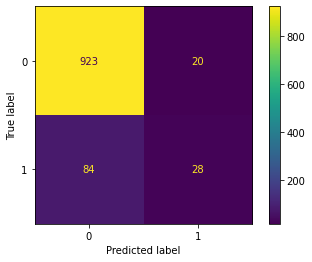

In [48]:
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=lr_model.classes_)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp_lr.plot()
plt.show()

## K Nearest Neighbor

In [49]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
y_pred_knn = knn_model.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       943
           1       0.68      0.48      0.56       112

    accuracy                           0.92      1055
   macro avg       0.81      0.73      0.76      1055
weighted avg       0.91      0.92      0.91      1055



In [51]:
knn_model.score(X_test, y_test)

0.9203791469194312

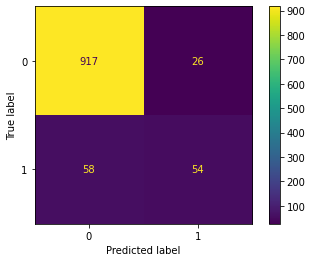

In [52]:
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn_model.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp_knn.plot()
plt.show()

## Decision Tree

In [53]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred_dtc = dtc_model.predict(X_test)
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       943
           1       0.51      0.50      0.50       112

    accuracy                           0.90      1055
   macro avg       0.72      0.72      0.72      1055
weighted avg       0.89      0.90      0.90      1055



In [55]:
dtc_model.score(X_test, y_test)

0.8957345971563981

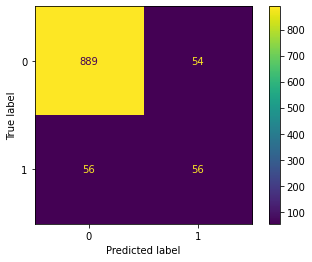

In [56]:
cm_dtc = confusion_matrix(y_test, y_pred_dtc, labels=dtc_model.classes_)
disp_dtc = ConfusionMatrixDisplay(confusion_matrix=cm_dtc, display_labels=dtc_model.classes_)
disp_dtc.plot()
plt.show()

## Random Forest

In [57]:
rdf_model = RandomForestClassifier()
rdf_model.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
y_pred_rdf = rdf_model.predict(X_test)
print(classification_report(y_test, y_pred_rdf))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       943
           1       0.71      0.50      0.59       112

    accuracy                           0.93      1055
   macro avg       0.83      0.74      0.77      1055
weighted avg       0.92      0.93      0.92      1055



In [59]:
rdf_model.score(X_test, y_test)

0.9251184834123223

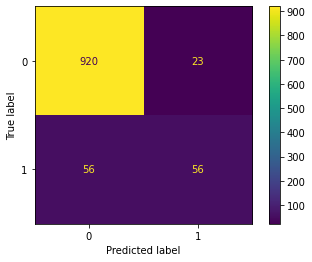

In [60]:
cm_rdf = confusion_matrix(y_test, y_pred_rdf, labels=rdf_model.classes_)
disp_rdf = ConfusionMatrixDisplay(confusion_matrix=cm_rdf, display_labels=rdf_model.classes_)
disp_rdf.plot()
plt.show()

# Preprocessing Data Test

### Data Cleaning

#### Missing Value

In [61]:
df_test.isna().values.any()

False

In [ ]:
# Run if result from above is True 
df_test.isna().sum()

#### Duplicated Data

In [62]:
df_test.duplicated().sum()

0

### Detect Outliers

In [63]:
numerical_test = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_day_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

In [64]:
# Using IQR
print(f'Jumlah baris sebelum memfilter outlier: {len(df_test)}')

filtered_entries = np.array([True] * len(df_test))

for col in numerical_test :
    Q1 = df_test[col].quantile(0.25)
    Q3 = df_test[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_test[col] >= low_limit) & (df_test[col] <= high_limit)) & filtered_entries
    
df_test = df_test[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_test)}')

Jumlah baris sebelum memfilter outlier: 750
Jumlah baris setelah memfilter outlier: 619


### Normalization

In [65]:
df_test.describe()

,id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000
mean,377.255250,99.211632,8.720517,181.143457,100.883683,30.795008,202.758158,101.093700,17.234620,198.636349,99.936995,8.938546,10.349435,4.339257,2.794814,1.384491
std,213.465093,39.207177,14.390005,50.274757,18.741454,8.546540,49.820416,18.611449,4.234713,50.313880,17.947268,2.264128,2.600525,2.019627,0.701795,0.980795
min,1.000000,1.000000,0.000000,47.400000,51.000000,8.060000,71.000000,50.000000,6.040000,61.400000,53.000000,2.760000,3.300000,1.000000,0.890000,0.000000
25%,195.500000,73.000000,0.000000,146.750000,88.000000,24.950000,167.600000,88.000000,14.250000,164.550000,88.000000,7.405000,8.700000,3.000000,2.350000,1.000000
50%,379.000000,100.000000,0.000000,178.700000,101.000000,30.380000,202.600000,101.000000,17.220000,197.400000,100.000000,8.880000,10.400000,4.000000,2.810000,1.000000
75%,555.500000,124.500000,22.000000,215.550000,114.000000,36.645000,235.750000,113.000000,20.040000,233.500000,112.000000,10.510000,12.100000,6.000000,3.270000,2.000000
max,750.000000,202.000000,51.000000,315.600000,151.000000,53.650000,324.800000,152.000000,27.610000,334.700000,148.000000,15.060000,17.000000,10.000000,4.590000,3.000000


In [66]:
df_test['account_length'] = MinMaxScaler().fit_transform(df_test['account_length'].values.reshape(len(df_test), 1))
df_test['number_vmail_messages'] = MinMaxScaler().fit_transform(df_test['number_vmail_messages'].values.reshape(len(df_test), 1))
df_test['total_day_minutes'] = MinMaxScaler().fit_transform(df_test['total_day_minutes'].values.reshape(len(df_test), 1))
df_test['total_day_calls'] = MinMaxScaler().fit_transform(df_test['total_day_calls'].values.reshape(len(df_test), 1))
df_test['total_day_charge'] = MinMaxScaler().fit_transform(df_test['total_day_charge'].values.reshape(len(df_test), 1))
df_test['total_eve_minutes'] = MinMaxScaler().fit_transform(df_test['total_eve_minutes'].values.reshape(len(df_test), 1))
df_test['total_eve_calls'] = MinMaxScaler().fit_transform(df_test['total_eve_calls'].values.reshape(len(df_test), 1))
df_test['total_eve_charge'] = MinMaxScaler().fit_transform(df_test['total_eve_charge'].values.reshape(len(df_test), 1))
df_test['total_night_minutes'] = MinMaxScaler().fit_transform(df_test['total_night_minutes'].values.reshape(len(df_test), 1))
df_test['total_night_calls'] = MinMaxScaler().fit_transform(df_test['total_night_calls'].values.reshape(len(df_test), 1))
df_test['total_night_charge'] = MinMaxScaler().fit_transform(df_test['total_night_charge'].values.reshape(len(df_test), 1))
df_test['total_intl_minutes'] = MinMaxScaler().fit_transform(df_test['total_intl_minutes'].values.reshape(len(df_test), 1))
df_test['total_intl_calls'] = MinMaxScaler().fit_transform(df_test['total_intl_calls'].values.reshape(len(df_test), 1))
df_test['total_intl_charge'] = MinMaxScaler().fit_transform(df_test['total_intl_charge'].values.reshape(len(df_test), 1))
df_test['number_customer_service_calls'] = MinMaxScaler().fit_transform(df_test['number_customer_service_calls'].values.reshape(len(df_test), 1))

In [67]:
df_test.describe()

,id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000
mean,377.255250,0.488615,0.170991,0.498671,0.498837,0.498684,0.519142,0.500919,0.518990,0.502145,0.494074,0.502321,0.514557,0.371029,0.514815,0.461497
std,213.465093,0.195061,0.282157,0.187452,0.187415,0.187465,0.196298,0.182465,0.196324,0.184098,0.188919,0.184075,0.189819,0.224403,0.189674,0.326932
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,195.500000,0.358209,0.000000,0.370433,0.370000,0.370476,0.380615,0.372549,0.380621,0.377424,0.368421,0.377642,0.394161,0.222222,0.394595,0.333333
50%,379.000000,0.492537,0.000000,0.489560,0.500000,0.489581,0.518519,0.500000,0.518312,0.497622,0.494737,0.497561,0.518248,0.333333,0.518919,0.333333
75%,555.500000,0.614428,0.431373,0.626957,0.630000,0.627002,0.649133,0.617647,0.649050,0.629711,0.621053,0.630081,0.642336,0.555556,0.643243,0.666667
max,750.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Encoding

In [68]:
categorical_test = ['area_code', 'international_plan', 'voice_mail_plan']

In [69]:
for col in categorical_test :
    df_test[col] = df_test[col].astype('category')
  
df_test.dtypes

id                                  int64
state                              object
account_length                    float64
area_code                        category
international_plan               category
voice_mail_plan                  category
number_vmail_messages             float64
total_day_minutes                 float64
total_day_calls                   float64
total_day_charge                  float64
total_eve_minutes                 float64
total_eve_calls                   float64
total_eve_charge                  float64
total_night_minutes               float64
total_night_calls                 float64
total_night_charge                float64
total_intl_minutes                float64
total_intl_calls                  float64
total_intl_charge                 float64
number_customer_service_calls     float64
dtype: object

In [70]:
for col in categorical_test:
    df_test[col] = df_test[col].cat.codes
  
df_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,0.631841,1,0,1,0.490196,0.811708,0.59,0.811801,0.498030,0.480392,0.497914,0.670692,0.400000,0.670732,0.489051,0.222222,0.489189,0.333333
1,2,AL,0.582090,2,1,0,0.000000,0.656227,0.47,0.656284,0.589441,0.500000,0.589244,0.521405,0.684211,0.521951,0.218978,0.555556,0.218919,0.000000
3,4,VT,0.457711,2,0,0,0.000000,0.534303,0.63,0.534328,0.579984,0.598039,0.579972,0.249543,0.715789,0.249593,0.350365,0.222222,0.351351,1.000000
4,5,NE,0.860697,1,0,0,0.000000,0.286726,0.25,0.286686,0.812057,0.607843,0.811776,0.692645,0.652632,0.692683,0.890511,0.444444,0.891892,1.000000
5,6,IL,0.701493,1,0,0,0.000000,0.139448,0.44,0.139504,0.258865,0.127451,0.258693,0.691914,1.000000,0.691870,0.795620,0.555556,0.794595,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,0.641791,1,0,0,0.000000,0.268456,0.48,0.268480,0.611899,0.460784,0.611961,0.517014,0.610526,0.517073,0.583942,0.666667,0.583784,0.000000
746,747,WA,0.358209,0,0,0,0.000000,0.483967,0.67,0.483878,0.786052,0.333333,0.785814,0.660080,0.621053,0.660163,0.656934,0.111111,0.656757,1.000000
747,748,WV,0.751244,1,0,0,0.000000,0.510067,0.39,0.509980,0.732072,0.225490,0.732035,0.556897,0.631579,0.556911,0.832117,0.111111,0.832432,1.000000
748,749,DC,0.298507,1,0,0,0.000000,0.347502,0.38,0.347445,0.401103,0.764706,0.401020,0.552506,0.463158,0.552846,0.751825,0.333333,0.751351,0.333333


# Predicting

## Select Features

In [71]:
# Features must match the features used for modeling
X = df_test[['international_plan', 'voice_mail_plan', 'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge']]
X.head()

,international_plan,voice_mail_plan,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge
0,0,1,0.811708,0.811801,0.498030,0.497914
1,1,0,0.656227,0.656284,0.589441,0.589244
3,0,0,0.534303,0.534328,0.579984,0.579972
4,0,0,0.286726,0.286686,0.812057,0.811776
5,0,0,0.139448,0.139504,0.258865,0.258693


## Random Forest
The Highest Accuracy between others

In [72]:
rdf_model = RandomForestClassifier()
rdf_model.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
y_pred = rdf_model.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,

In [74]:
ds = pd.Series(y_pred)
ds

0      0
1      0
2      0
3      0
4      0
      ..
614    0
615    0
616    0
617    0
618    0
Length: 619, dtype: int8

In [75]:
ds.value_counts()

0    569
1     50
dtype: int64

## Detect Ouliers

In [76]:
# Using Data Test Beginning
old_df_test = pd.read_csv('/content/drive/MyDrive/FGA-Binar Academy/Challenge Chapter 2/test.csv')
old_df_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [77]:
old_numerical_test = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_day_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

In [78]:
import numpy as np

# Using IQR
print(f'Jumlah baris sebelum memfilter outlier: {len(old_df_test)}')

filtered_entries = np.array([True] * len(old_df_test))

for col in old_numerical_test :
    Q1 = old_df_test[col].quantile(0.25)
    Q3 = old_df_test[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((old_df_test[col] >= low_limit) & (old_df_test[col] <= high_limit)) & filtered_entries
    
old_df_test = old_df_test[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(old_df_test)}')

Jumlah baris sebelum memfilter outlier: 750
Jumlah baris setelah memfilter outlier: 619


## Reset Index

In [79]:
old_df_test.index

Int64Index([  0,   1,   3,   4,   5,   7,   8,  12,  13,  14,
            ...
            740, 741, 742, 743, 744, 745, 746, 747, 748, 749],
           dtype='int64', length=619)

In [80]:
new_df_test = old_df_test.reset_index()
new_df_test

,index,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,1,KS,128,area_code_415,no,yes,25,265.1,110,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,2,AL,118,area_code_510,yes,no,0,223.4,98,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,4,VT,93,area_code_510,no,no,0,190.7,114,...,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
3,4,5,NE,174,area_code_415,no,no,0,124.3,76,...,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
4,5,6,IL,142,area_code_415,no,no,0,84.8,95,...,136.7,63,11.62,250.5,148,11.27,14.2,6,3.83,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,745,746,GA,130,area_code_415,no,no,0,119.4,99,...,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
615,746,747,WA,73,area_code_408,no,no,0,177.2,118,...,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
616,747,748,WV,152,area_code_415,no,no,0,184.2,90,...,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
617,748,749,DC,61,area_code_415,no,no,0,140.6,89,...,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [81]:
new_df_test.drop('index', axis=1, inplace=True)

In [82]:
new_df_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
3,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
4,6,IL,142,area_code_415,no,no,0,84.8,95,14.42,136.7,63,11.62,250.5,148,11.27,14.2,6,3.83,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
615,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
616,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
617,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


## Add Prediction Result to Data Test

In [83]:
new_df_test['churn'] = ds
new_df_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
3,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0
4,6,IL,142,area_code_415,no,no,0,84.8,95,14.42,...,63,11.62,250.5,148,11.27,14.2,6,3.83,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,...,97,19.24,202.7,111,9.12,11.3,7,3.05,0,0
615,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,...,84,22.99,241.8,112,10.88,12.3,2,3.32,3,0
616,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,0
617,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0


In [84]:
new_df_test.isna().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [85]:
new_df_test['churn'].value_counts()

0    569
1     50
Name: churn, dtype: int64

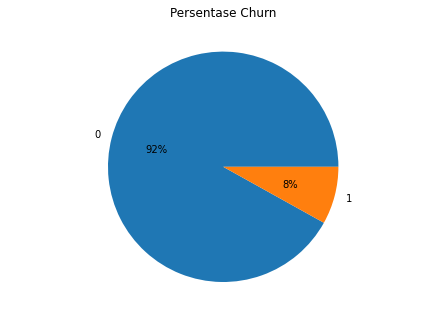

In [86]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['0','1']
Churn = new_df_test.churn.value_counts()
ax.pie(Churn, labels=labels, autopct='%.0f%%')
plt.title('Persentase Churn')
plt.show()

## Export to CSV

In [87]:
new_df_test.to_csv('/content/drive/MyDrive/FGA-Binar Academy/Challenge Chapter 2/new_test.csv', index=False)